In [7]:
import keras
keras.__version__

'2.2.5'

In [8]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)

# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [9]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Using word-embeddings 

In [10]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Training the model with Embedding and SimpleRNN layers

In [11]:
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN

model = keras.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


20000/20000 [==============================] - 20s 1ms/step - loss: 0.6781 - acc: 0.5592 - val_loss: 0.6289 - val_acc: 0.6634
Epoch 2/10
20000/20000 [==============================] - 19s 965us/step - loss: 0.4529 - acc: 0.7993 - val_loss: 0.4239 - val_acc: 0.8142
Epoch 3/10
20000/20000 [==============================] - 19s 956us/step - loss: 0.3038 - acc: 0.8791 - val_loss: 0.4125 - val_acc: 0.8124
Epoch 4/10
20000/20000 [==============================] - 19s 954us/step - loss: 0.2105 - acc: 0.9198 - val_loss: 0.3913 - val_acc: 0.8334
Epoch 5/10
20000/20000 [==============================] - 19s 953us/step - loss: 0.1375 - acc: 0.9537 - val_loss: 0.4755 - val_acc: 0.7964
Epoch 6/10
20000/20000 [==============================] - 19s 957us/step - loss: 0.0903 - acc: 0.9715 - val_loss: 0.4000 - val_acc: 0.8560
Epoch 7/10
20000/20000 [==============================] - 19s 954us/step - loss: 0.0576 - acc: 0.9824 - val_loss: 0.5601 - val_acc: 0.8052
Epoch 8/10
20000/20000 [================

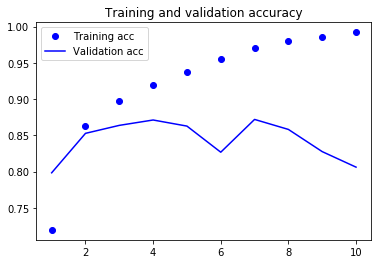

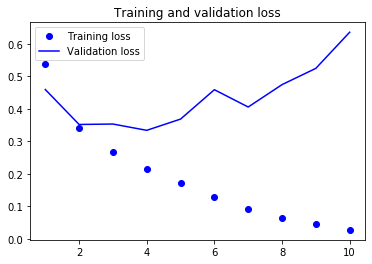

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Training the model with Embedding and SimpleRNN layers

In [14]:
from keras.layers import LSTM

model = keras.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 89s 4ms/step - loss: 0.5172 - acc: 0.7549 - val_loss: 0.4397 - val_acc: 0.8072
Epoch 2/10
20000/20000 [==============================] - 90s 4ms/step - loss: 0.2990 - acc: 0.8807 - val_loss: 0.3547 - val_acc: 0.8534
Epoch 3/10
20000/20000 [==============================] - 89s 4ms/step - loss: 0.2377 - acc: 0.9100 - val_loss: 0.3319 - val_acc: 0.8546
Epoch 4/10
20000/20000 [==============================] - 89s 4ms/step - loss: 0.1951 - acc: 0.9289 - val_loss: 0.3096 - val_acc: 0.8860
Epoch 5/10
20000/20000 [==============================] - 89s 4ms/step - loss: 0.1785 - acc: 0.9349 - val_loss: 0.2964 - val_acc: 0.8888
Epoch 6/10
20000/20000 [==============================] - 90s 4ms/step - loss: 0.1644 - acc: 0.9405 - val_loss: 0.3673 - val_acc: 0.8644
Epoch 7/10
20000/20000 [==============================] - 89s 4ms/step - loss: 0.1451 - acc: 0.9502 - val_loss: 0.3641 - val_acc:

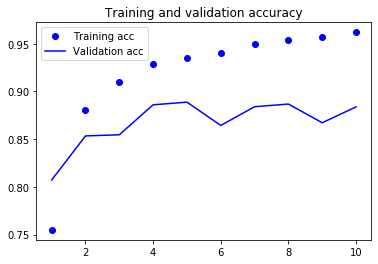

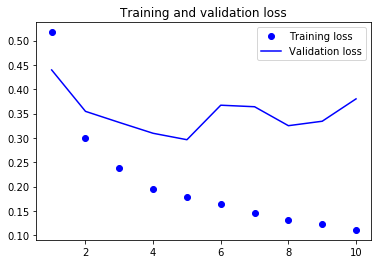

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()